In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy as sp

In [2]:
import scienceplots # se non c'è, in terminale scrivere: pip install SciencePlots
plt.style.use(['science','notebook','grid'])

In [3]:


q = 0.1
r = 0.2

P = np.array([[1-q, r], [q, 1-r]]) #stochastic matrix

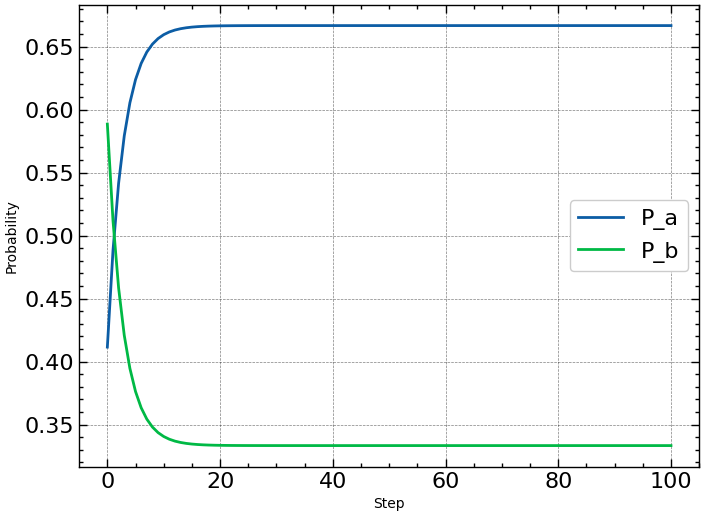

In [4]:
#Let's iterate over the stochastic matrix to find P_a and P_b

# Define the initial state
rd = random.random()

x = np.array([rd, 1-rd])

# Define the number of iterations
n_steps = 100

# Iterate the stochastic matrix
P_a = [x[0]]
P_b = [x[1]]
for i in range(n_steps):
    x = np.dot(P, x)
    P_a.append(x[0])
    P_b.append(x[1])

# Plot the results
plt.plot(P_a, label='P_a')
plt.plot(P_b, label='P_b')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [5]:
#Now let's find the expected values of P_a(inf) and P_b(inf) by finding the eigenvector associated with the eigenvalue = 1

In [6]:
# eigenvects returns a list of tuples of the form (eigenvalue, algebraic_multiplicity, [eigenvectors]).

In [7]:
P_sym = sp.Matrix(P)
eigenvals = P_sym.eigenvals()
eigenvecs = P_sym.eigenvects()

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvals)
print("Eigenvectors:", eigenvecs)


Eigenvalues: {1.00000000000000: 1, 0.700000000000000: 1}
Eigenvectors: [(1.00000000000000, 1, [Matrix([
[0.894427190999916],
[0.447213595499958]])]), (0.700000000000000, 1, [Matrix([
[-0.74535599249993],
[ 0.74535599249993]])])]


In [8]:
print(eigenvecs[0][2][0]) #this gives a strange tuple, so we need to unpack it

Matrix([[0.894427190999916], [0.447213595499958]])


In [9]:
for eigenvector in eigenvecs:
    if eigenvector[0] == 1:
        eigenvector1_components = eigenvector[2][0]  # extract the eigenvector components as a list
        w_a, w_b = eigenvector1_components  # assign the components to the variables w_a and w_b
        break  # exit the loop once we've found the eigenvector
        
print(w_a, w_b)

0.894427190999916 0.447213595499958


In [10]:
# we need to normalize them

norm = w_a + w_b
w_a /= norm
w_b /= norm

print("the expected value are: \nP_a(inf) = {} \nP_b(inf) = {}".format(w_a, w_b))

the expected value are: 
P_a(inf) = 0.666666666666667 
P_b(inf) = 0.333333333333333


In [11]:
#Let's compare them with what we have found iterating over the stochastic matrix

print("In the last iteration of our code over the stochastic matrix, we have found: \nP_a({}) = {} \nP_b({}) = {}".format(n_steps, P_a[n_steps], n_steps, P_b[n_steps]))

In the last iteration of our code over the stochastic matrix, we have found: 
P_a(100) = 0.6666666666666689 
P_b(100) = 0.33333333333333454


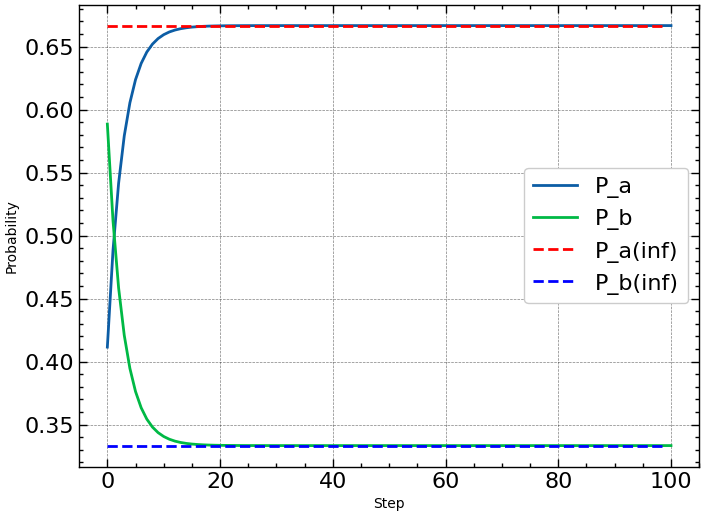

In [12]:
plt.plot(P_a, label='P_a')
plt.plot(P_b, label='P_b')
plt.plot([w_a]*n_steps, 'r--', label='P_a(inf)')
plt.plot([w_b]*n_steps, 'b--', label='P_b(inf)')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [13]:
# now let's simulate the dynamics of the system, we should find the same thing

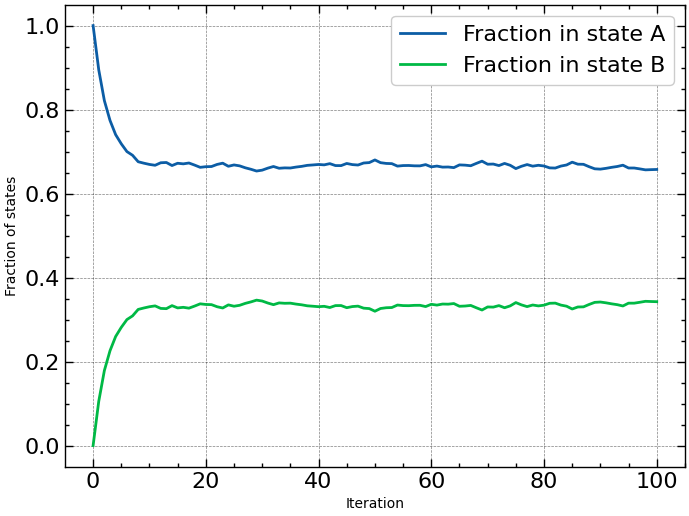

In [14]:
# Initialize the system
num_systems = 10000
states = ['A'] * num_systems #I put them all in A

# calculate the fraction of A and B at the first step
num_A = 0
num_B = 0
for i in range(num_systems):

    if states[i] == 'A':
        num_A += 1
    else:
        num_B += 1

fractions_A = [num_A / num_systems]
fractions_B = [num_B / num_systems]


# Run the simulation for some iterations
num_iterations = 100

for t in range(num_iterations):
    num_A = 0
    num_B = 0
    for i in range(num_systems):
        # Generate a random number between 0 and 1
        rand_num = random.uniform(0, 1)
        
        # Move the system to a new state based on the probability of the transition
        if states[i] == 'A':
            if rand_num < q:
                states[i] = 'B'
            else:
                states[i] = 'A'
        else:
            if rand_num < r:
                states[i] = 'A'
            else:
                states[i] = 'B'
        
        # Count the number of systems in each state
        if states[i] == 'A':
            num_A += 1
        else:
            num_B += 1
    
    # Calculate the fraction of systems in each state and add it to the lists
    fraction_A = num_A / num_systems
    fraction_B = num_B / num_systems
    fractions_A.append(fraction_A)
    fractions_B.append(fraction_B)


    
plt.plot(fractions_A, label='Fraction in state A')
plt.plot(fractions_B, label='Fraction in state B')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fraction of states')
plt.show()


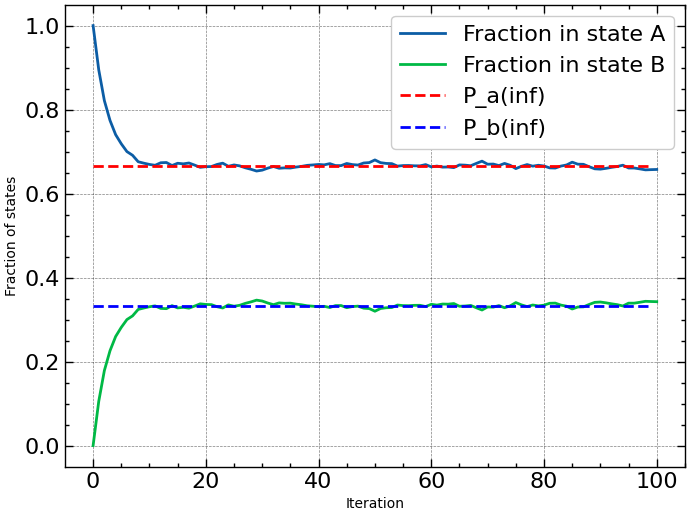

In [15]:
#Let's see how they compare with the expected value at inf

plt.plot(fractions_A, label='Fraction in state A')
plt.plot(fractions_B, label='Fraction in state B')
plt.plot([w_a]*n_steps, 'r--', label='P_a(inf)')
plt.plot([w_b]*n_steps, 'b--', label='P_b(inf)')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fraction of states')
plt.show()